In [1]:
import keras
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.xception import decode_predictions
from keras.applications.xception import preprocess_input

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
from scipy import misc
import glob


### Overconfidence of the network

In [3]:
model = keras.applications.xception.Xception(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

91889664/91884032 [==============================] - 14s 0us/step


In [4]:
datagen=ImageDataGenerator()
generator=datagen.flow_from_directory('./example_images/')

Found 10 images belonging to 2 classes.


In [5]:
ls example_images/

out-of-distribution/  sources.txt  variational_dropout/


CVPR 2015 - Deep Neural Networks are Easily Fooled: High Confidence Predictions for Unrecognizable Images

In [6]:
# The deep neural network is the pre-trained network modeled on AlexNet provided by Caffe.

40960/35363 [==================================] - 0s 3us/step


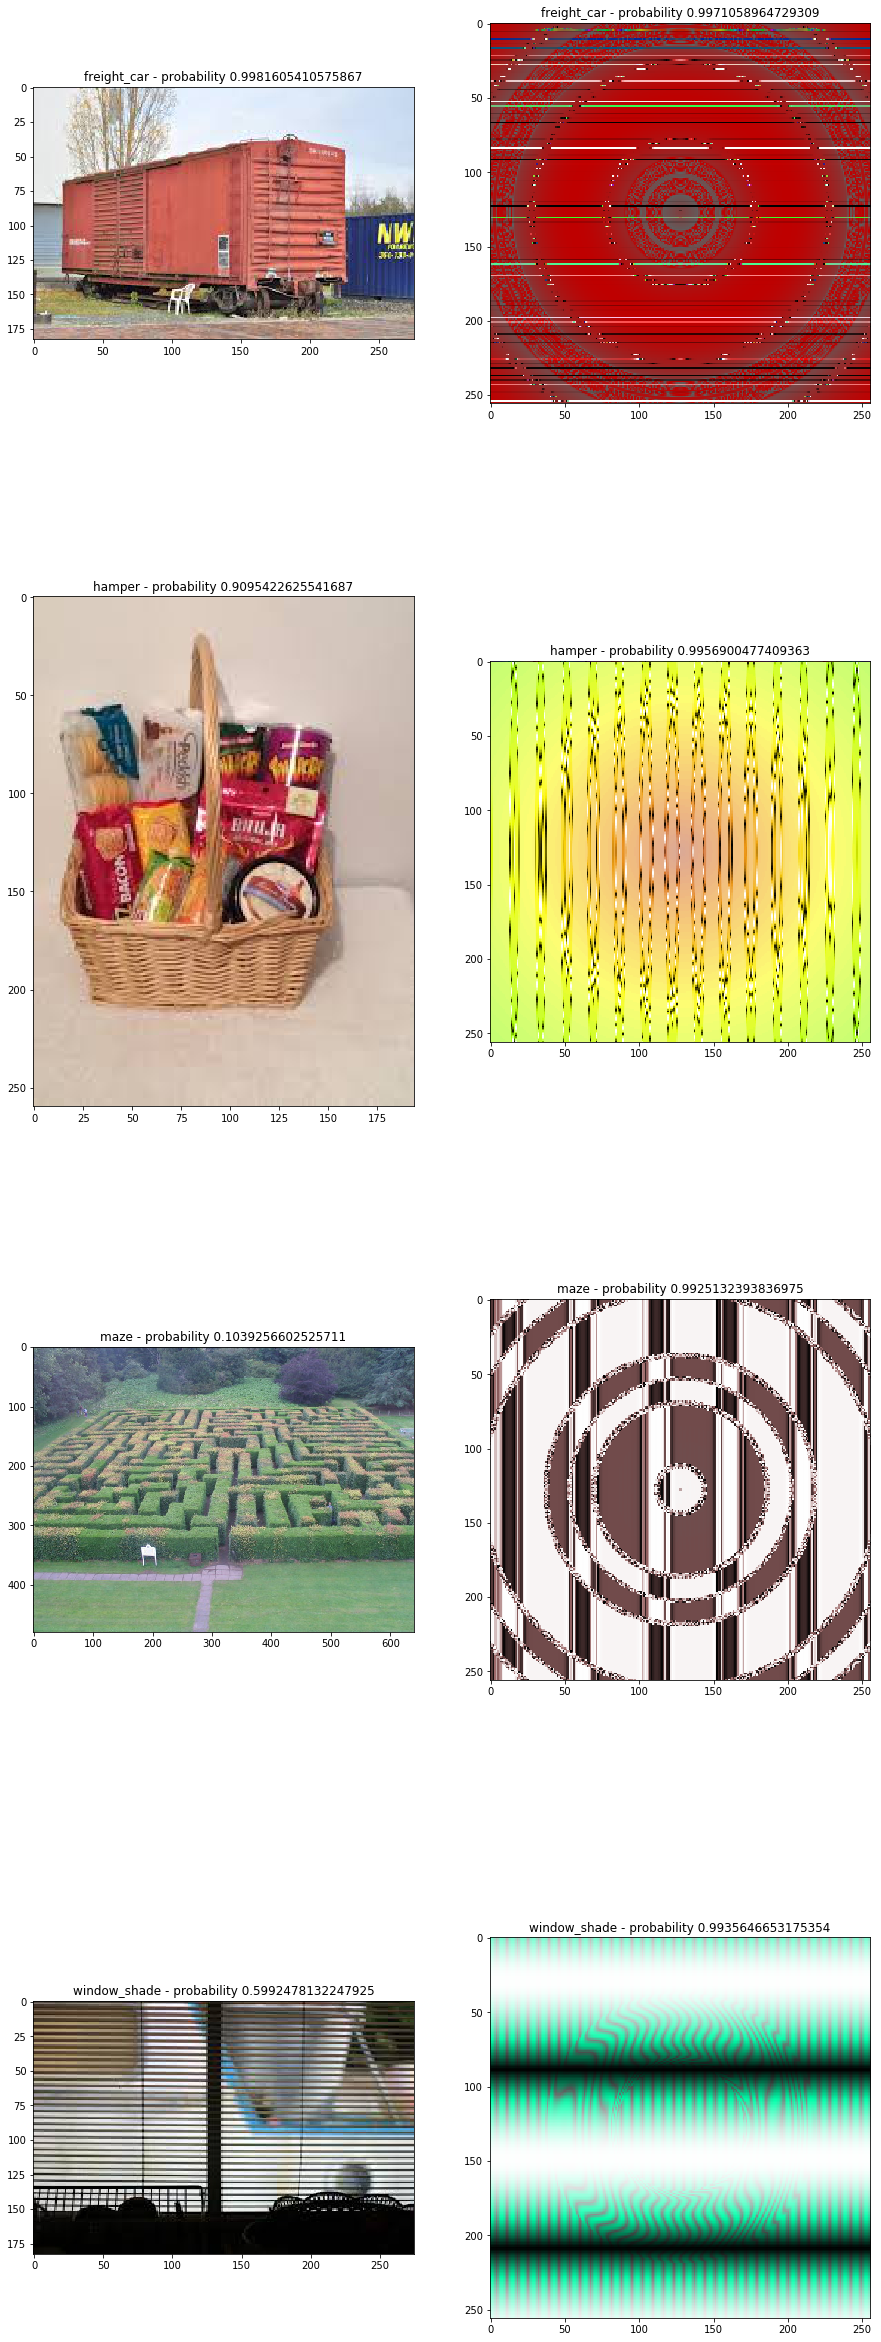

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 45))

files = sorted(glob.glob("./example_images/out-of-distribution/*"))

for j, image_path in enumerate(files):
    image_ = image.load_img(image_path)
    
    image_preprocessed = preprocess_input(image.img_to_array(image_)[np.newaxis])
    
    preds = model.predict(image_preprocessed)
    
    y = j % 2
    x = j // 2
    axes[x, y].imshow(image_)
    img_, class_, prob_ = decode_predictions(preds)[0][0]
    axes[x, y].set_title(f'{class_} - probability {prob_}')

    j += 1
